# Segmentação de imagens de varredura eletrônica 
* Primeiro é usada uma técnica de **Equalização de histograma** para melhorar o contraste da imagem.
  * [Create CLAHE](https://docs.opencv.org/master/d5/daf/tutorial_py_histogram_equalization.html)
* Na segunda étapa são testados dois algoritmos de segmentação.
  * [ADAPTIVE Thresholding](https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html)
* Por fim são usadas técnicas de morfologia para melhorar a segmentação.
  * [Dilation e Erosion](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html)

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Função para plotar as imagens lado a lado

In [2]:
def image_plot(img, seg_img, titulo):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    seg_img = cv2.cvtColor(seg_img, cv2.COLOR_BGR2RGB)

    fig, ax1 = plt.subplots(1, 2, figsize=(12, 7))
    plt.tight_layout()
    fig.suptitle(titulo[0])
    ax1[0].set_title(titulo[1])
    ax1[1].set_title(titulo[2])
    ax1[0].imshow(img)
    ax1[1].imshow(seg_img)
    
    plt.show()

### Lendo a imagem e melhorando o contraste da mesma

In [3]:
img = cv2.imread("migro.png") # Lendo a imagem
img_normal = img.copy()
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Tranformando em escala de cinsar 1 canal
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8)) # Criando o objeto de equalização
cl1 = clahe.apply(gray_image) # Aplicando o equalizador na imagem 

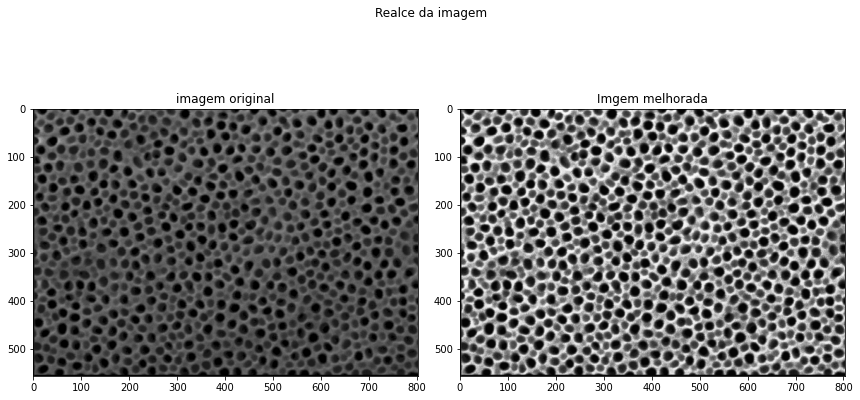

In [4]:
# Plotando a imagem normal do lado da imagem com o contraste melhorado
image_plot(img, cl1, ["Realce da imagem", "imagem original" , "Imgem melhorada"])

In [5]:
output_adapthresh = cv2.adaptiveThreshold(cl1, 255.0,
		cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 17, 3)


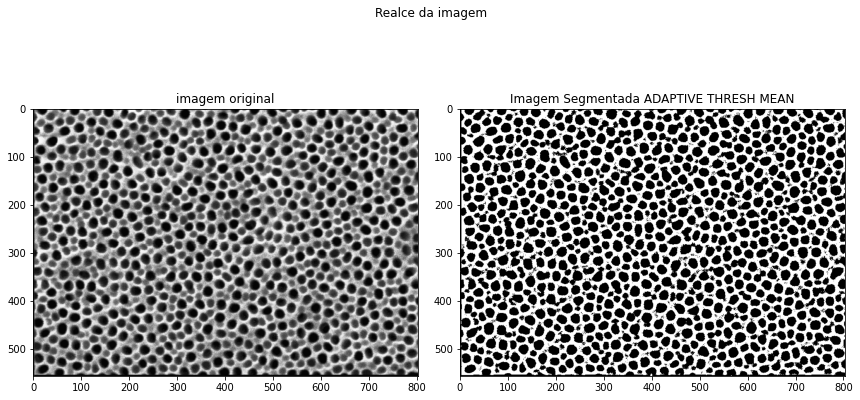

In [6]:
image_plot(cl1, output_adapthresh, ["Realce da imagem", "imagem original" , "Imagem Segmentada ADAPTIVE THRESH MEAN"])

In [7]:
for i in range(0, output_adapthresh.shape[0]):
    for j in range(0, output_adapthresh.shape[1]):
        if output_adapthresh[i][j] == 255:
            output_adapthresh[i][j] = 0
        else:
            output_adapthresh[i][j] = 255

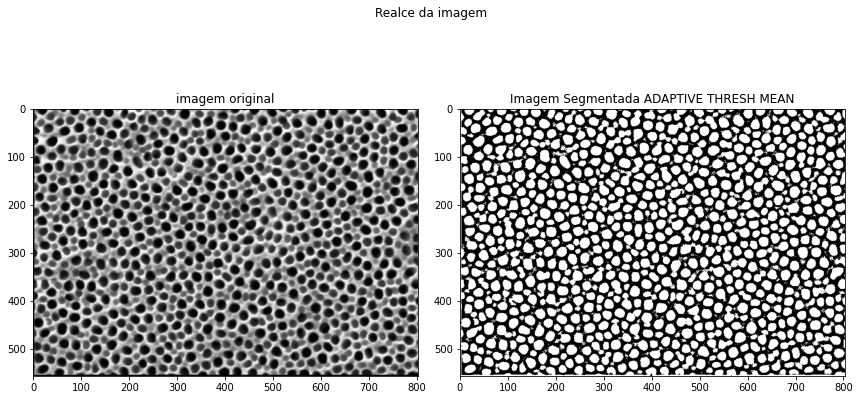

In [8]:
image_plot(cl1, output_adapthresh, ["Realce da imagem", "imagem original" , "Imagem Segmentada ADAPTIVE THRESH MEAN"])

In [9]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(output_adapthresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=2)

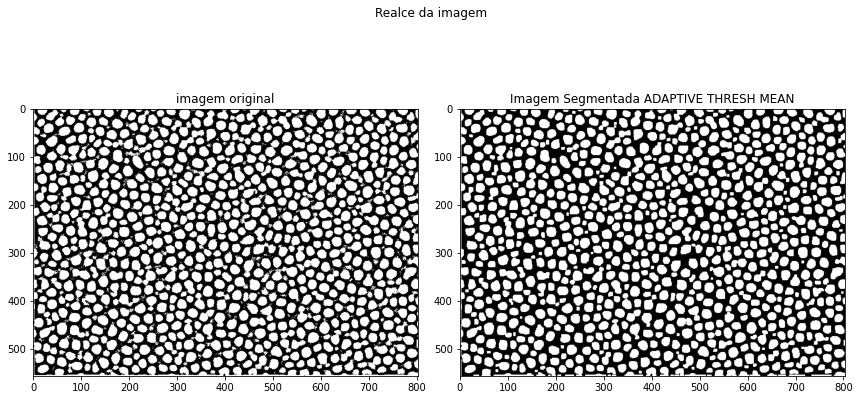

In [10]:
image_plot(output_adapthresh, opening, ["Realce da imagem", "imagem original" , "Imagem Segmentada ADAPTIVE THRESH MEAN"])

In [11]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


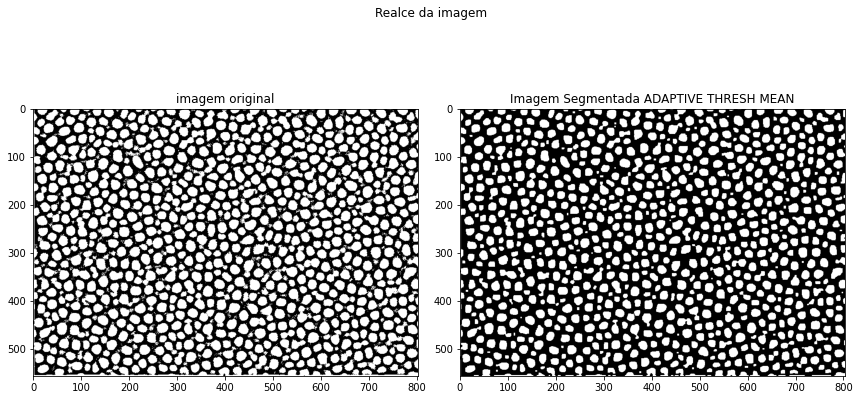

In [12]:
image_plot(output_adapthresh, sure_fg, ["Realce da imagem", "imagem original" , "Imagem Segmentada ADAPTIVE THRESH MEAN"])

In [13]:

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

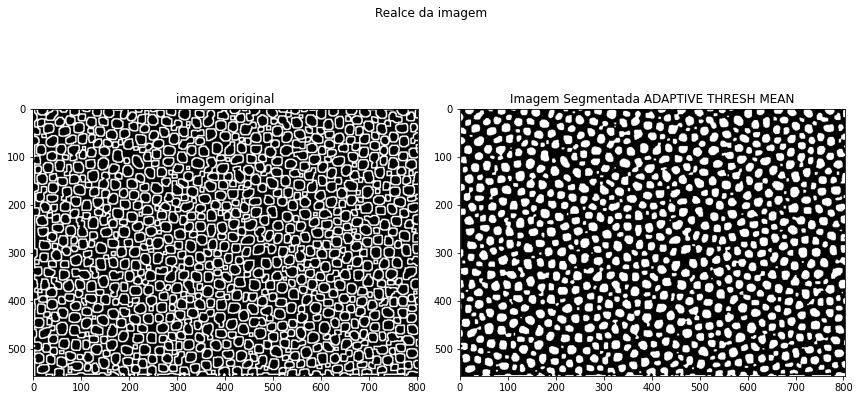

In [14]:
image_plot(unknown, sure_fg, ["Realce da imagem", "imagem original" , "Imagem Segmentada ADAPTIVE THRESH MEAN"])

In [56]:
cl1 = cv2.cvtColor(cl1, cv2.COLOR_BGR2RGB)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
cl1[markers == -1] = [255,0,0]

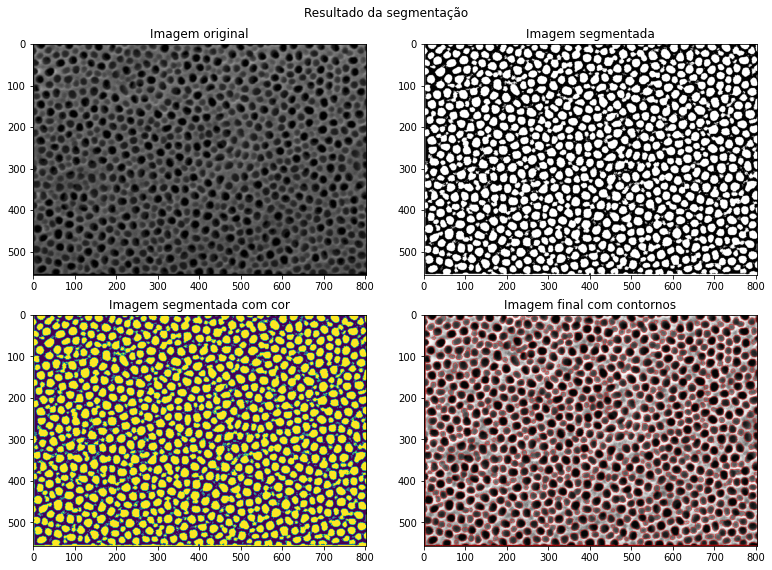

In [59]:
output_adapthresh_1 = cv2.cvtColor(output_adapthresh, cv2.COLOR_BGR2RGB)
fig, ax1 = plt.subplots(2, 2, figsize=(11, 8))
fig.suptitle("Resultado da segmentação")

ax1[0][0].imshow(img_normal)
ax1[0][0].set_title("Imagem original")

ax1[0][1].imshow(output_adapthresh_1)
ax1[0][1].set_title("Imagem segmentada")

ax1[1][0].imshow(output_adapthresh)
ax1[1][0].set_title("Imagem segmentada com cor")

ax1[1][1].imshow(cl1)
ax1[1][1].set_title("Imagem final com contornos")

plt.tight_layout()
plt.savefig('resultado.jpg', format='jpg')
plt.show()